<h1>Sales Data Analysis<h1>

In this notebook we try to solve the questions presented in this database.

Q: What was the best Year for sales? How much was earned that Year?

Q: What was the best month for sales? How much was earned that month?

Q: What City had the highest number of sales?

Q: What time should we display adverstisement to maximize likelihood of customer's buying product?

Q: What products are most often sold together?

Q: What product sold the most? Why do you think it sold the most?

<h3>Import libraries</h3>

In [284]:
import pandas as pd
import seaborn as sns

<h3>Import Data</h3>

In [285]:
data_1 = pd.read_csv('data\Sales_April_2019.csv')
data_2 = pd.read_csv('data\Sales_August_2019.csv')
data_2 = pd.read_csv('data\Sales_August_2019.csv')
data_3 = pd.read_csv('data\Sales_December_2019.csv')
data_4 = pd.read_csv('data\Sales_February_2019.csv')
data_1 = pd.read_csv('data\Sales_April_2019.csv')
data_5 = pd.read_csv('data\Sales_January_2019.csv')
data_6 = pd.read_csv('data\Sales_July_2019.csv')
data_7 = pd.read_csv('data\Sales_June_2019.csv')
data_8 = pd.read_csv('data\Sales_March_2019.csv')
data_9 = pd.read_csv('data\Sales_May_2019.csv')
data_10 = pd.read_csv('data\Sales_November_2019.csv')
data_11 = pd.read_csv('data\Sales_October_2019.csv')
data_12 = pd.read_csv('data\Sales_September_2019.csv')

#we are concatenating the data in one table called data
data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_12,data_12],axis=0)
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<h3>Cleaning the data</h3>

<AxesSubplot:>

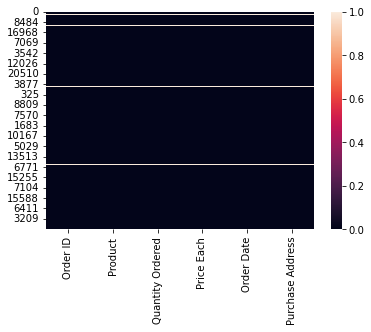

In [286]:
#heatmap to check nulls
sns.heatmap(data=pd.isnull(data))

In [287]:
#drop nas from the data 
data = data.dropna()
#we check the size and confirm the drop
data.size

1065804

In [288]:
#check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177634 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          177634 non-null  object
 1   Product           177634 non-null  object
 2   Quantity Ordered  177634 non-null  object
 3   Price Each        177634 non-null  object
 4   Order Date        177634 non-null  object
 5   Purchase Address  177634 non-null  object
dtypes: object(6)
memory usage: 9.5+ MB


In [289]:
#we have a problem with the data that has text repetition
data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [290]:
#create filter to drop text values
filter_repeated_values = data['Quantity Ordered'] != 'Quantity Ordered'

#replace data without text values in quality ordered
data = data[filter_repeated_values]


In [291]:
#check data quantity ordered
data['Quantity Ordered'].unique()
data.size

1063770

In [292]:
#Create month, year, time column
data['month'] = data['Order Date'].str[0:2]
data['year'] = data['Order Date'].str[6:8]
data['time'] = data['Order Date'].str[-6:-3]
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,19,20
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,19,16
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,19,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,17


In [293]:
#change columns types
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [294]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177295 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          177295 non-null  object 
 1   Product           177295 non-null  object 
 2   Quantity Ordered  177295 non-null  int64  
 3   Price Each        177295 non-null  float64
 4   Order Date        177295 non-null  object 
 5   Purchase Address  177295 non-null  object 
 6   month             177295 non-null  object 
 7   year              177295 non-null  object 
 8   time              177295 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 13.5+ MB


In [295]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,19,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,19,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,19,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,17


<h3>Modify Data</h3>

In [296]:
#take cityy from address
city = data['Purchase Address'].str.split(", ",expand=True)[1]
city

0               Dallas
2               Boston
3          Los Angeles
4          Los Angeles
5          Los Angeles
             ...      
11681      Los Angeles
11682    San Francisco
11683    San Francisco
11684    San Francisco
11685    San Francisco
Name: 1, Length: 177295, dtype: object

In [297]:
#join city colum to data
data = pd.concat([data,city],axis=1)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,1
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,19,20,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,19,16,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,19,07,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,17,San Francisco


In [298]:
#rename column name
data = data.rename({1:'City'},axis=1)

In [299]:
#create a Sales column = Price * Quantity
data['Sales'] = data['Quantity Ordered']*data['Price Each']

In [300]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,19,20,Los Angeles,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,19,16,San Francisco,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,19,07,San Francisco,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,17,San Francisco,379.99


<h3>Questions</h3>

Q1: What was the best Year for sales? How much was earned that Year?

In [301]:
#take columns from data
data_q1 = data[['year','Sales']]

In [302]:
#only one year, 2019 was the best year
data_q1.groupby(['year']).sum()

,Sales
year,
19,32845298.33
20,8670.29


Q2: What was the best month for sales? How much was earned that month?

In [303]:
#create data and group by month, sorted by sales
data_q2 = data[['month','Sales']]
data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

month
12    4613443.34
09    4193023.52
04    3390670.24
11    3196092.72
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
01    1822256.73
10       6706.62
Name: Sales, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sales'>

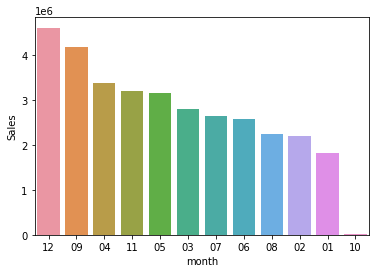

In [304]:
#make bar plot with sns
plot_q2 = data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q2.index ,y= plot_q2)

Q3: What City had the highest number of sales?

In [305]:
data_q3 = data[['City','Sales']]
data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

City
San Francisco    7860909.43
Los Angeles      5194343.65
New York City    4479206.81
Boston           3541682.40
Atlanta          2660134.48
Dallas           2608458.64
Seattle          2586845.81
Portland         2199267.28
Austin           1723120.12
Name: Sales, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Sales'>

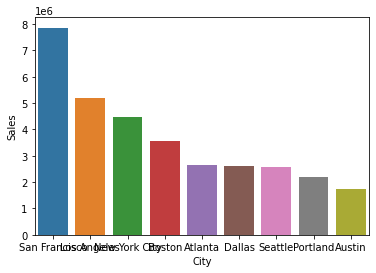

In [306]:
plot_q3 = data_q3.groupby(['City']).sum().sort_values(['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q3.index, y=plot_q3)

Q4: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [307]:
data_q4 = data[['time','Sales']]
data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

time
 00    184.131196
 01    193.772155
 02    192.073159
 03    167.419837
 04    193.745121
 05    173.015943
 06    178.345165
 07    185.385208
 08    190.365778
 09    188.903434
 10    179.572145
 11    184.822925
 12    181.111718
 13    176.622085
 14    189.736802
 15    190.651427
 16    182.715282
 17    196.899655
 18    180.940680
 19    187.424061
 20    188.075694
 21    184.215066
 22    181.951777
 23    186.983804
Name: Sales, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Sales'>

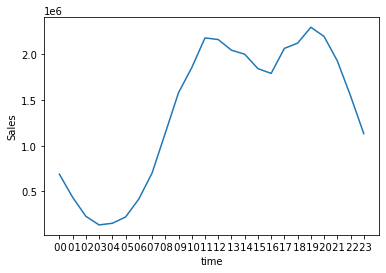

In [311]:
plot_q4 = data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

sns.lineplot(x=plot_q4.index , y=plot_q4)

Q5: What products are most often sold together?

In [324]:
data_q5 = data[['Order ID','Product']]
data_q5 = data_q5[data_q5.duplicated(keep=False)].sort_values(['Product'])
data_q5

,Order ID,Product
2111,250173,20in Monitor
7282,255124,20in Monitor
75,248223,20in Monitor
8538,256342,20in Monitor
7697,255525,20in Monitor
...,...,...
551,248685,iPhone
8065,255882,iPhone
8070,255887,iPhone
2862,250893,iPhone


In [330]:
data_q5.groupby('Order ID').sum()['Product']

Order ID
142071          AA Batteries (4-pack)AA Batteries (4-pack)
145143    Lightning Charging CableLightning Charging Cable
146765                            Google PhoneGoogle Phone
147707                    Wired HeadphonesWired Headphones
148984            USB-C Charging CableUSB-C Charging Cable
                                ...                       
314675          AA Batteries (4-pack)AA Batteries (4-pack)
315204                    Wired HeadphonesWired Headphones
315955                      ThinkPad LaptopThinkPad Laptop
316173        AAA Batteries (4-pack)AAA Batteries (4-pack)
317971          AA Batteries (4-pack)AA Batteries (4-pack)
Name: Product, Length: 11460, dtype: object

In [339]:
data_q5_groups = pd.DataFrame(data_q5.groupby('Order ID').sum()['Product'])
data_q5_groups['number'] = data_q5_groups.index
data_q5_groups.groupby(['Product']).count().sort_values(['number'],ascending=False).head(10)


,number
Product,
USB-C Charging CableUSB-C Charging Cable,1374
AA Batteries (4-pack)AA Batteries (4-pack),1307
AAA Batteries (4-pack)AAA Batteries (4-pack),1282
Lightning Charging CableLightning Charging Cable,1259
Wired HeadphonesWired Headphones,1125
Apple Airpods HeadphonesApple Airpods Headphones,921
Bose SoundSport HeadphonesBose SoundSport Headphones,809
27in FHD Monitor27in FHD Monitor,466
27in 4K Gaming Monitor27in 4K Gaming Monitor,369


Q6: What product sold the most? Why do you think it sold the most?

In [345]:
data_q6 = data[['Product','Quantity Ordered']]
data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

Product
AAA Batteries (4-pack)        29582
AA Batteries (4-pack)         26469
USB-C Charging Cable          22900
Lightning Charging Cable      22080
Wired Headphones              19585
Apple Airpods Headphones      14955
Bose SoundSport Headphones    12822
27in FHD Monitor               7240
iPhone                         6531
34in Ultrawide Monitor         5905
27in 4K Gaming Monitor         5903
Google Phone                   5277
Flatscreen TV                  4588
Macbook Pro Laptop             4491
20in Monitor                   3978
ThinkPad Laptop                3919
Vareebadd Phone                1991
LG Washing Machine              651
LG Dryer                        626
Name: Quantity Ordered, dtype: int64

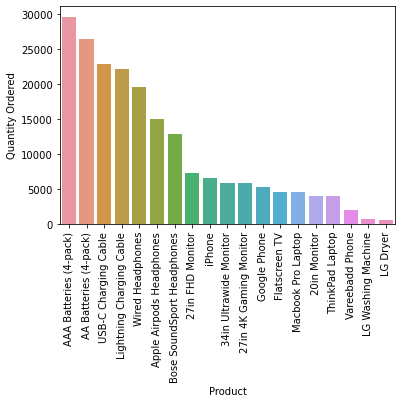

In [350]:
plot_q6 = data_q6.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

plt = sns.barplot(x=plot_q6.index, y=plot_q6)

for item in plt.get_xticklabels():
    item.set_rotation(90)